### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33445.7773
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 33219.2695
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 32986.7500
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 32742.7637
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 32482.3848
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 32205.6934
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 31930.7285
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 31679.9160
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 31452.1094
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 31245.3848
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - loss: 31048.9160
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 30811.7090
Epoch 13/300


### Predicting For the next 10 data

In [8]:
# # demonstrate prediction for next 10 days
# x_input = array([187, 196, 210])
# temp_input=list(x_input)
# lst_output=[]
# i=0
# while(i<10):
    
#     if(len(temp_input)>3):
#         x_input=array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         #print(x_input)
#         x_input = x_input.reshape((1, n_steps, n_features))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.append(yhat[0][0])
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.append(yhat[0][0])
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps, n_features))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.append(yhat[0][0])
#         lst_output.append(yhat[0][0])
#         i=i+1
    

# print(lst_output)

In [9]:
# Import necessary libraries
from numpy import array

# Define the input sequence
x_input = array([187, 196, 210])

# Define variables
n_steps = 3
n_features = 1

# Store input sequence in a list
temp_input = list(x_input)
lst_output = []

# Predict for the next 10 days
for i in range(10):
    if len(temp_input) > 3:
        x_input = array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])

print(lst_output)


[225.4311, 237.3191, 252.32822, 267.64276, 281.92404, 298.1821, 314.68387, 331.32965, 349.39264, 367.94635]


In [10]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [11]:
len(timeseries_data)

9

In [12]:
lst_output

[225.4311,
 237.3191,
 252.32822,
 267.64276,
 281.92404,
 298.1821,
 314.68387,
 331.32965,
 349.39264,
 367.94635]

In [13]:
# lst

### Visualizaing The Output

In [14]:
import matplotlib.pyplot as plt

In [15]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

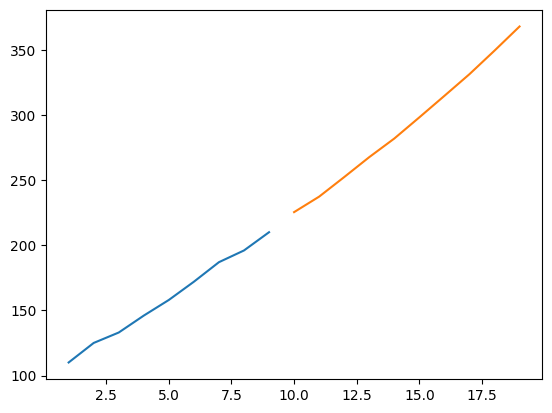

In [16]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
